Coursera의 Neural Networks for Machine Learning 강의를 정리한 내용임.   
2016.10.31. by Dongwan Kim

# Week4. Learning feature vectors for words

### Lecture 4a. Learning to predict the next word

> 지난주(Week3)에서 backpropagation에 대해서 배워보았고,

> 이번 강의에서는 **relational information**을         
**backpropagation**을 이용하여 단어간의 의미(혹은 관계)를 학습한     
**feature vector**들로 표현해 보겠다는 것이다.


<u>Relational information</u>

> 우선 **relational information**이 등장하는데...     

<img  src="./_images/04_family_tree1.PNG"/>

> 위에 두 가문의 가계도가 제시되어 있다. 모두 3대에 걸쳐 있고,     
첫번째 가계도는 영국의 어떤 가문이고, 아래 것은 이탈리아의 어떤 가문이다.   
 
> 그런데 위와 같은 가계도(family tree)는 tree형태가 아니라      
<u>**A**와 **B**는 어떤 관계(**R**)이다.</u>라는     
세단어(a set of triples)형태의 명제(proposition)로도 표현할 수 있다.

> 예를들어 아래와 같이 **A** has-**R** **B** 로 표현할 수 있다.             
> (colin has-father james)      
(colin has-mother victoria)      
(james has-wife victoria)     
참고로 세번째 명제는 첫번째와 두번째 명제를 통해 유추 가능하다.    


> 그리고 가계도에서 A와 B에는 어떠한 이름도 올 수 있을 것이고,     
관계(relationship)는 아래의 12가지 표현으로 충분하다.

> son, daughter, nepheu, niece,        
father, mother, uncle, aunt,       
brother, sister, husband, wife


<u>A relational learning task</u>

> 여기에서 Neural network를 이용해서 하려는 것은     
아래와 같은 관계형 정보가 주어져 있을 때     
(colin has-father james)      
(colin has-mother victoria)

> Neural network를 학습 시켜서    
colin와 james 그리고 victoria 사이의 규칙(regularity)를 찾아      
(james has-wife ?)를 입력 했을 때     
victoria 를 정답으로 내놓는 network를 만드는 것이다.

<img  src="./_images/04_nn_family_tree1.PNG"/>

> 저자가 만든 neural network는 위와 같이 생겼는데..   
자세한 내용은 1986년 논문을 보면 알 수 있다.(위 NN도식은 논문의 figure5와 같음.)   
[http://www.cogsci.ucsd.edu/~ajyu/Teaching/Cogs202_sp12/Readings/hinton86.pdf]

> 간략히 위 NN을 살펴보면      
- layer 1의 [local encoding of person1]은 24개 unit인데, 전체 데이터 세트(112개 triple)에 포함된 사람이 24명이고, 각 사람을 독립적으로 encoding 하여, 어떤 사람이든 24개 unit중 하나만 1인 값을 갖도록 한다. 아래 matrix에서 각 row를 한 사람이라 할 수 있다.

In [63]:
import numpy as np
input_person = np.diag([1] * 24)
print(input_person)
input_person[0]  # person: Christopher

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

> - layer 1의 [local encoding of relationship]은 12개 unit인데, relationship이 12가지 이므로 ('local encoding of person1'과 마찬가지로) 각각을 하나의 bit로 encoding해서 입력한다.

In [58]:
import numpy as np
input_person = np.diag([1] * 12)
input_person[0]  # relationship: son

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

> - layer 2의 [distributed enoding of person 1]과 [distributed encoding of relationship]은 각각 6 unit으로 구성되어 있고, 학습이 진행되면서 각각 person들 내의 어떤 규칙과 relationship들 간의 어떤 규칙을 학습하게 된다.(layer1과 layer2사이의 weight에 정보가 학습된다는 표현이 맞겠음..)

> - layer 3의 [units that learn to predict features of the output from features of the inputs]은 12개 unit으로 구성되어 있고, 그 역할은 명확히 언급되어 있지 않다.

> - layer 4의 [distributed encoding of person 2]은 6개 unit으로 구성되어 있고, 다음 layer에 후보 person을 찍어주는 역할을 한다.
> - layer 5는 말 그대로 output layer로서 후보들간의 가능성을 수치 혹은 (논문에서는) 도형으로 표현한다.

> 아래 그림은 layer1의 [local encoding of person1]과 [distributed encoding of person1]을 잊는 weight들을 표현한다.      
[local encoding of person1]과 [distributed encoding of person1]가 각각 24, 6개 unit으로 구성되어 있으므로    
weight matrix의 shape은 6x24 일테고, 그 값들을 그림으로 표현하면 아래와 같다.      
(1986년 논문이므로 weight 계산과 표현을 위해 아래 그림과 같이 뭔가 다른? 방법을 사용했던 것으로 보인다.)


> 아래에서 볼 수 있는 것 처럼 Nationality, generation, beanch of the family tree가 드러남을 알 수 있다.      
예를들어 오른쪽 첫번째 그림은 영국인 가계도와 이탈리안 가계도를 구분 짓고 있다.     
그리고 오른쪽 맨 아래 그림은 할아버지 대와 나머지를 구분 짓고 있다.   

<img  src="./_images/04_layer2.PNG"/>

> 저자는 112개 데이터에서 108개를 training data로 사용하고     
나머지 4개를 test data로 사용하여 모델을 시험 했고 
좋은 성능을 얻었다고 함.    

> 앞서 언급한 논문에 weight을 조절할 때 가중치를 어떻게 줬고    
얼마나 weight decaying을 적용 했는지 등이 언급되어 있음.

### Lecture 4b. A brief diversion into cognitive science

> 인지과학에서 어떤 개념을 표현하는 몇가지 주장에 대해서 설명하고 있는데     
결국 neural network를 이용해 이들을 잘 표현할 수도 있다는 내용으로... 생략

### Lecture 4c. Another diversion: The softmax output function

<u>Problems with squared error</u>

> output unit으로 logistic function(sigmoid)을 사용하고,       
squared error를 cost function으로 사용할 때   
gradient는 아래와 같은데,   
(Lecture note - [Week3 > Lecture 3d > Backpropagating dE/dy])

$$\begin{align}
\frac{\partial E}{\partial w_{ij}} &= y_i \frac{\partial E}{\partial z_j} \\
&= - y_i y_j (1 - y_j) (t_j - y_j)
\end{align}$$

> 즉 logistic function의 derivative값에 영향을 받는데,     
true output과 network output이 양극단(1 vs 0, 0 vs 1)일 때    
그 값이 거의 0에 가깝다.    
따라서 이런 경우 weight을 거의 수정하지 못하게 된다

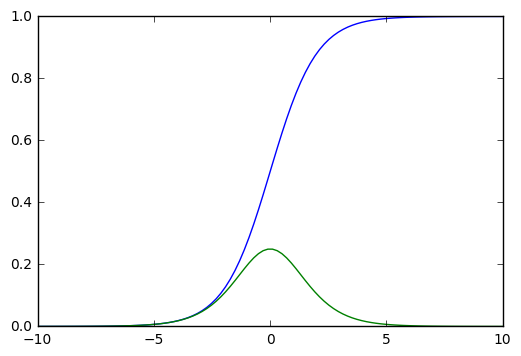

In [95]:
# Ploting sigmoid function & it's derivative
def get_y_sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def get_y_sigmoid_deri(x):
    return get_y_sigmoid(x) * (1 - get_y_sigmoid(x))

# plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = [get_y_sigmoid(i) for i in x]
d = [get_y_sigmoid_deri(i) for i in x]
plt.plot(x, y);
plt.plot(x, d);
plt.show()

> 두번째로...    
여러 선택지(multi-class classification)중에서   
하나만 정답인 상황(mutually exclusive)에서는   
logistic unit 보다는 softmax unit을 사용하는 것이 더 좋음.


> - multi-class classification에서 logistic function을 이용하는 경우     
여럿 중 하나만 성공이고 나머지는 모두 실패인 확률을 여러개 모형화 하기 때문     
(marginal distribution and a Bernoulli likelihood)

> - softmax의 경우 각각의 성공 확률을 모형화 함   
(join distribution and a multinomial likelihood)


<u>**Softmax**</u>

> Softmax function은 아래와 같다.

$$y_i = \frac{e^{z_i}}{\sum_{j \in group} e^{z_j}}$$

<img  src="./_images/04_softmax3.PNG"/>

> logistic function의 경우 $y_i$는 $z_i$에 의해서만 결정되었지만     
softmax function의 경우 $z_i$뿐만 아니라 다른 $z$들도 $y_i$에 영향을 준다.

<u>Cross-entropy</u>

> 분류(classification) 문제에서 squared error 보다 나은      
cost function으로 cross-entropy를 많이 사용한다.

> 예를들어 0과 1 사이의 값을 갖는 output unit 하나로 구성된 output layer가 구성되어 있다고 해 보자.            
이때 true output이 1인 경우 0에 가까운 값으로 예측한 경우 더 큰 cost를 주고 싶을 것이고          
반대로 true output이 0인 경우 1에 가까운 값을 예측할 수록 더 큰 cost를 주는 것이 합리적이다.

> 이런 조건을 아래와 같이 모형화 할 수 있다.

> - true output이 1인 경우($t$는 output unit의 true output)    
Cost를 아래와 같이 사용하고
$$C_1 = -t ~ log(y)$$

> - true output이 0인 경우      
Cost를 아래와 같이 사용할 수 있다.
$$C_0 = -(1 - t) ~ log (1 - y)$$

> 두 경우(1, 0)를 합쳐서 cost function을 아래와 같다

$$C = -t ~ log(y) - (1 - t) ~ log (1 - y)$$

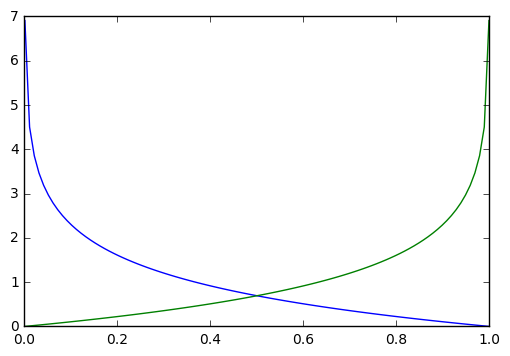

In [109]:
# Ploting cross-entropy(binary case)
def get_y_neg_log(x):  # cost when true output is 1
    return -1 * np.log(x)

def get_y_pos_log(x):  # cost when true output is 0
    return -1 * np.log(1-x)
# plot
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1/1000, 1 - 1/1000, 100)
y = [get_y_neg_log(i) for i in x]
d = [get_y_pos_log(i) for i in x]
plt.plot(x, y);
plt.plot(x, d);
plt.show()

> 앞서의 예는 output unit이 하나인 경우 였고      
output unit이 다수 인 경우의 cross-entropy는 아래와 같다.   
($t_j$는 $j$번째 output unit의 true output)      

$$C = -\sum_{j}t_j log y_j$$

> cross-entropy의 input $z_i$에 대한 편미분은 아래와 같다.

$$\frac{\partial C}{\partial z_i} = \sum_{j} \frac{\partial C}{\partial y_j} \frac{\partial y_j}{\partial z_i} = y_i - t_i$$

> 즉 true output과 network output과의 차이가 커질 수록 경사가 커지게 된다.

### Lecture 4d. Neuro-probabilistic language models

> 문장의 단어들을 듣고 다음에 올 단어를 맞추는 문제를 푸는 방법으로   
**trigram** method라는 것이 있다.

> 많은 양의 글에서 3단어 쌍의 빈도를 추출하고     
단어 a, b 다음에 올 단어들의 상대적 확률을 계산한다.

$$\frac{p(w_3 = c ~|~ w_2 = b, w_1 = a)}{p(w_3 = d ~|~ w_2 = b, w_1 = a)} = \frac{count(abc)}{count(abd)}$$


> hidden unit이 많아질 수록 추론해야 하는 weight이 많아지고      
그에 따라 많은 training 데이터가 필요해진다.    
또한 softmax와 같은 경우 output unit이 많아질 수록 각 output unit의 probability가 지나치게 작아지게 된다.

> 이런 문제를 해결 할 수 있는 방법이 없을까?

<img  src="./_images/04_bengio1.PNG"/>

### Lecture 4e. Ways to deal with the large number of possible outputs in neuro-probabilistic language models

> 예를들어 3단어 다음에 나올 단어를 예측하는 문제의 경우,     
3번째 나올 수 있는 단어의 수는 수없이 많다.   

> softmax를 이용해서 이런 문제를 풀 경우    
이런 수없이 많은 단어들에 대한 확률을 구해야 한다.    

> 이런 문제를 효과적으로 풀 수 있는 방법에 대해서 알아보자.




<u>A serial architecture</u>

> 다음에 나올 단어를 찾는 문제에서      
앞서 bengio의 neural net과 같은 접근 방법에서는     
후보 단어의 수 만큼의 output dimension이 필요 했었다.    

> 이처럼 큰 output dimension을 피하기 위한 아이디어로    
Serial architecture가 있다.

> Serial architecture에서는 우선 첫번째, 두번째 단어는 고정시키고     
후보 단어만을 바꿔서, 각 후보 단어에 대한 logit score를 구한다.            
후보 단어가 $n$개 라면 $n$개의 logit score가 나올 것이고     

> 이 logit score들을 softmax function에 넣어 각 후보들에 대한      
확률을 구할 수 있다.
이 확률을 true output과 비교하여 cross-entropy를 구하고    
이를 이용하여 back-propagation을 진행한다.      

> 만약 후보 단어가 (미리) 특정 범위의 단어로 좁혀져 있다면     
학습 시간을 줄일 수 있는데,      
예를들어 기존의 trigram model등을 통해 후보군을 줄일 수 있다.   

<img  src="./_images/04_serial_arch1.PNG"/>

<u>Structured words into a tree</u>

> 두번째 방법으로 tree model을 사용하는 방법이 있다.

> root에서부터 아래로 내려오는데, 각 라인은 확률값을 의미한다.      
bottom leaf까지 내려오면서 지나온 선의 확률 값을 곱하여   
그 값이 최대가 되는 path를 선택하는 방법이다.

<img  src="./_images/04_words_tree1.PNG"/>

> Collobert와 Weston의 아이디어는 문장속의 11개 단어를 windowing하는 방법인데       
중심이 되는 단어 이전의 5개 단어와 다음의 5단어를 input 으로 하는데,      
중심이 되는 단어 자리에 실제 문장속의 단어를 넣거나 random word를 넣어    
학습 시키는 방법이다.

> 결국 중심 단어가 문맥에 맞는 단어인지, 맞지 않는 단어인지를 학습하게 됨(binary classification)

<img  src="./_images/04_collobert1.PNG"/>

> 단어에 대한 (learned) feature vector를 이용하여       
단어들간의 유사도를 시각화 할 수 있다면 좋을 것이다.    
그런데 우리가 만들어내는 feature vector는 매우 high-dimensional이므로    
시각화 하기가 쉽지 않다.


> 강의에서는 t-sne라는 방법론을 사용한다.    
[https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf]
> 이 방법은 PCA와 같이 차원축소(dimensionality reduction) 방법인데     
특히 high-dimensional data에 유용하다고 함.

> 예를들어 강의 초반에 나왔던 0부터 9까지의 손글씨 데이터(MNIST dataset)를 t-sne로 시각화 하면 아래와 같다. 9개의 그룹을 확인 할 수 있다.

<img  src="./_images/04_tsne1.jpg"/>

> 단어들에 대한 feature vector또한 t-sne를 이용하여 아래와 같이 시각화 할 수 있다.

<img  src="./_images/04_tsne2.PNG"/>